<a href="https://colab.research.google.com/github/myihbach/Optimization_algorithms/blob/main/Spectral_step_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D


# Definition des fonctions J1 , J2 , J5 , J6 et JR  

In [ ]:
def J1(v):
  v=np.array(v)
  n = len(v)
  v0 = np.ones(n)
  return [np.dot(v-v0,v-v0),2*(v-v0)]

def J2(v):
  v=np.array(v)
  n = len(v)
  v0 = np.arange(1,n+1)
  return [np.dot(v-v0,v-v0),2*(v-v0)]

def J5(v):
  v=np.array(v)
  n = len(v)
  A = 2 * np.eye(n)
  f= np.ones(n)
  B = np.diagflat(-1 * f[:n-1],1)
  A = A + B + np.transpose(B)
  Av = np.dot(A,v)
  return [(1/2)*np.dot(Av,v) - np.dot(f,v) + np.dot(v,v) , Av - f + 2 * v ]

def J6(v):
  v=np.array(v)
  n = len(v)
  A = 2 * np.eye(n)
  f= np.ones(n)
  B = np.diagflat(-1 * f[:n-1],1)
  A = A + B + np.transpose(B)
  Av = np.dot(A,v)
  vv = np.dot(v,v)
  return [(1/2)*np.dot(Av,v) - np.dot(f,v) + np.dot(vv,vv) , Av - f + 4 * v**3 ]

def JR(v):
  v=np.array(v)
  n = len(v)
  #La fonction JR 
  val=0
  for i in range(n-1):
    val += ( v[i+1] - v[i]**2 )**2 + ( v[i] - 1 )**2
  #Le grandient de JR

  grad = []
  for i in range (n):
    if i == 0:
      grad.append(- 4 * v[i] * (v[i+1] - v[i]**2) - 2 * (1 - v[i]))
    elif i == n-1:
      grad.append( 2 * ( v[n-1] - v[i-1]**2 ) )
    else:
      grad.append( 2 * (v[i] - v[i-1]**2) - 4 * v[i] * (v[i+1] - v[i]**2) - 2* (1- v[i]))
  return [val , np.array(grad) ]



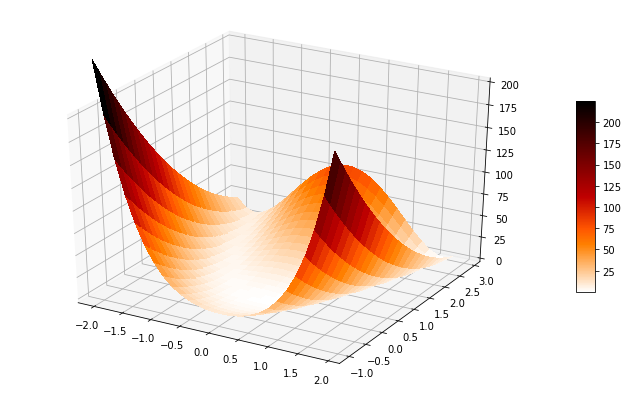

In [ ]:
b = 10;
f = lambda x,y: (x-1)**2 + b*(y-x**2)**2;
# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

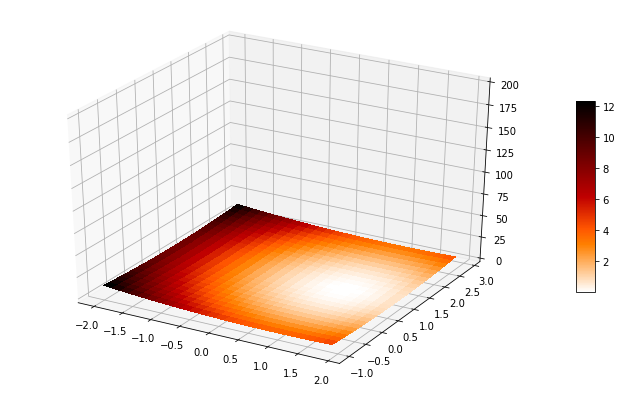

In [ ]:
b = 1;
f = lambda x,y: (x-1)**2+(y-1)**2;
# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [ ]:
def gradient_descent_fixed_step(u0,Kmax):
  t = time.time()
  eps = 10**-10
  eta = 0.0005
  nbr_iteration=0
  grad = func(u0)[1]
  while np.linalg.norm(grad) > eps and nbr_iteration <= Kmax :
    u0 = u0 - eta * grad
    grad = func(u0)[1]
    nbr_iteration += 1
  #print(u0)
  #print(nbr_iteration)
  #print('time : ' , time.time() - t)
  return u0
  

In [ ]:
  gradient_descent_fixed_step(np.zeros(10),1000)

[0.26562906 0.3097921  0.31564169 0.31627411 0.31633106 0.31633106
 0.31627411 0.31564169 0.3097921  0.26562906]
1001
time :  0.0441744327545166


array([0.26562906, 0.3097921 , 0.31564169, 0.31627411, 0.31633106,
       0.31633106, 0.31627411, 0.31564169, 0.3097921 , 0.26562906])

In [ ]:
def gradient_barzilai_borwein_1(N):
  t = time.time()
  eps = 10**-15
  Kmax = 1500
  nbr_iteration = 0
  u0 = np.zeros(N)
  u1 = gradient_descent_fixed_step(u0,1)
  f_ui = [ func(u1)[0] ]
  grad0 , grad1 = func(u0)[1] , func(u1)[1]
  while np.linalg.norm(grad1) > eps and nbr_iteration <= Kmax :
    sk_1  = u1 - u0 
    gk_1 = grad1 - grad0
    eta_bb = np.dot(sk_1,sk_1) / np.dot(gk_1,sk_1)
    u0 = u1
    u1 = u0 - grad1 *eta_bb 
    f_ui.append( func(u1)[0] )
    grad0 , grad1 = func(u0)[1] , func(u1)[1]
    nbr_iteration += 1
  
  print(u1)
  print(func(u1)[0])
  print(nbr_iteration)
  print('time : ' , time.time() - t)
  return f_ui

In [ ]:
def gradient_barzilai_borwein_2(N):
  t = time.time()
  eps = 10**-15
  Kmax = 1500
  nbr_iteration = 0
  u0 = np.zeros(N)
  u1 = gradient_descent_fixed_step(u0,1)
  f_ui = [ func(u1)[0] ]
  grad0 , grad1 = func(u0)[1] , func(u1)[1]
  while np.linalg.norm(grad1) > eps and nbr_iteration <= Kmax :
    sk_1  = u1 - u0 
    gk_1 = grad1 - grad0
    eta_bb = np.dot(sk_1,gk_1) / np.dot(gk_1,gk_1)
    u0 = u1
    u1 = u0 - grad1 * eta_bb 
    f_ui.append( func(u1)[0] )
    grad0 , grad1 = func(u0)[1] , func(u1)[1]
    nbr_iteration += 1
  
  print(u1)
  print(func(u1)[0])
  print(nbr_iteration)
  print('time : ' , time.time() - t)
  return f_ui 

In [ ]:
gradient_barzilai_borwein_1(10)
print('==================')
gradient_barzilai_borwein_2(10)

[0.36602451 0.46409807 0.49036778 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036778 0.46409807 0.36602451]
-2.3169877408056045
15
time :  0.005415201187133789
[0.36602451 0.46409807 0.49036778 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036778 0.46409807 0.36602451]
-2.316987740805603
15
time :  0.004137277603149414


[-0.009983512496250001,
 -2.2707280320765917,
 -2.292151401144969,
 -2.3157508990691484,
 -2.316952908292587,
 -2.316982364739055,
 -2.3169861872478825,
 -2.3169876694040066,
 -2.316987737284565,
 -2.3169877388498796,
 -2.316987740713984,
 -2.316987740800541,
 -2.3169877408041604,
 -2.3169877408054367,
 -2.316987740805597,
 -2.316987740805603]

In [ ]:
def test(N):
  bb1=gradient_barzilai_borwein_1(N)
  bb2=gradient_barzilai_borwein_2(N)
  n1 = len(bb1)
  n2 = len(bb2)
  """if n1 > n2 :
    bb1 = bb1[0: - (n1 - n2)]
  elif n2 > n1 :
    bb2 = bb2[0: - (n2 - n1)]
  else :
    pass
  """
  x1 = np.arange(n1)
  x2 = np.arange(n2)

  plt.plot(x1,bb1,'r')
  plt.plot(x2,bb2,'g')
  plt.grid()




In [ ]:
def func(v):
  return JR(v)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
5.053640174072107e-31
160
time :  0.03392744064331055
[nan nan nan nan nan nan nan nan nan nan]
nan
191
time :  0.03608131408691406


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


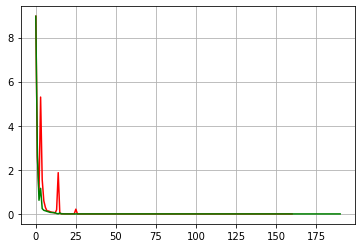

In [ ]:
test(10)

In [ ]:
gradient_barzilai_borwein_1(10)

[0.36602451 0.46409807 0.49036778 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036778 0.46409807 0.36602451]
-2.3169877408056045
15
time :  0.009537220001220703


[-0.009983512496250001,
 -2.273056869497212,
 -2.284964833463685,
 -2.314903445161072,
 -2.3169375467378193,
 -2.3169845569389826,
 -2.3169869803846113,
 -2.3169877185595094,
 -2.316987739020042,
 -2.31698773961442,
 -2.31698774074051,
 -2.3169877408019532,
 -2.316987740804285,
 -2.316987740805583,
 -2.3169877408055988,
 -2.3169877408056045]